In [55]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

#nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#for word cloud
from wordcloud import WordCloud, STOPWORDS

In [2]:
vader=SentimentIntensityAnalyzer()

In [3]:
#for reference
text="I hate 🐈 "
vader.polarity_scores(text)

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}

In [4]:
df=pd.read_csv("cleaned_data.csv")

In [5]:

f=lambda x:vader.polarity_scores(x)["pos"]
neu=lambda x:vader.polarity_scores(x)["neu"]
neg=lambda x:vader.polarity_scores(x)["neg"]
c=lambda x:vader.polarity_scores(x)["compound"]

In [6]:
weights = {"Review Summary" : 0.4, "Review Details" : 0.6}

In [7]:
df["Review Summary"].apply(f)

0      0.639
1      0.639
2      0.639
3      0.639
4      0.000
       ...  
375    0.000
376    0.000
377    0.677
378    0.677
379    0.000
Name: Review Summary, Length: 380, dtype: float64

In [8]:
#Percentage weightage
weights = {"Review Summary" : 0.4, "Review Details" : 0.6}

In [9]:
#Creating Weighted Series
weighted_pos=df["Review Summary"].apply(f)*weights["Review Summary"]+df["Review Detail"].apply(f)*weights["Review Details"]

weighted_compound=df["Review Summary"].apply(c)*weights["Review Summary"]+df["Review Detail"].apply(c)*weights["Review Details"]

weighted_neg=df["Review Summary"].apply(neg)*weights["Review Summary"]+df["Review Detail"].apply(neg)*weights["Review Details"]

weighted_neu=df["Review Summary"].apply(neu)*weights["Review Summary"]+df["Review Detail"].apply(neu)*weights["Review Details"]

In [10]:
#Adding Columns to Dataframe
df["VADER_neg"]=weighted_neg
df["VADER_pos"]=weighted_pos
df["VADER_neu"]=weighted_neu
df["VADER_compound"]=weighted_compound


In [11]:
#checking for VADER_neg values
df.sort_values("VADER_neg").tail(3)

,Product name,Product price,Number of ratings,Number of reviews,Review Summary,Review Detail,VADER_neg,VADER_pos,VADER_neu,VADER_compound
250,Lenovo Legion 5 AMD Ryzen 5 Hexa Core 4600H - ...,SGD 936.0,10,8,Terrible Customer Service,This laptop is frustratingly slow. It struggle...,0.374,0.0642,0.5618,-0.44358
247,Lenovo Legion 5 AMD Ryzen 5 Hexa Core 4600H - ...,SGD 936.0,10,8,Poor Screen Quality,This laptop is frustratingly slow. It struggle...,0.374,0.0642,0.5618,-0.44358
144,Lenovo Legion 5 AMD AMD Ryzen 7 Octa Core 5800...,SGD 1576.0,88,18,Very poor,"Very powerful gaming machine, but I highly rec...",0.376,0.1104,0.5142,0.17418


In [12]:
# 7 unique name/model
df["Product name"].nunique()

7

Text(0.5, 1.0, 'Sentiment Analysis on the different models: Compound Score')

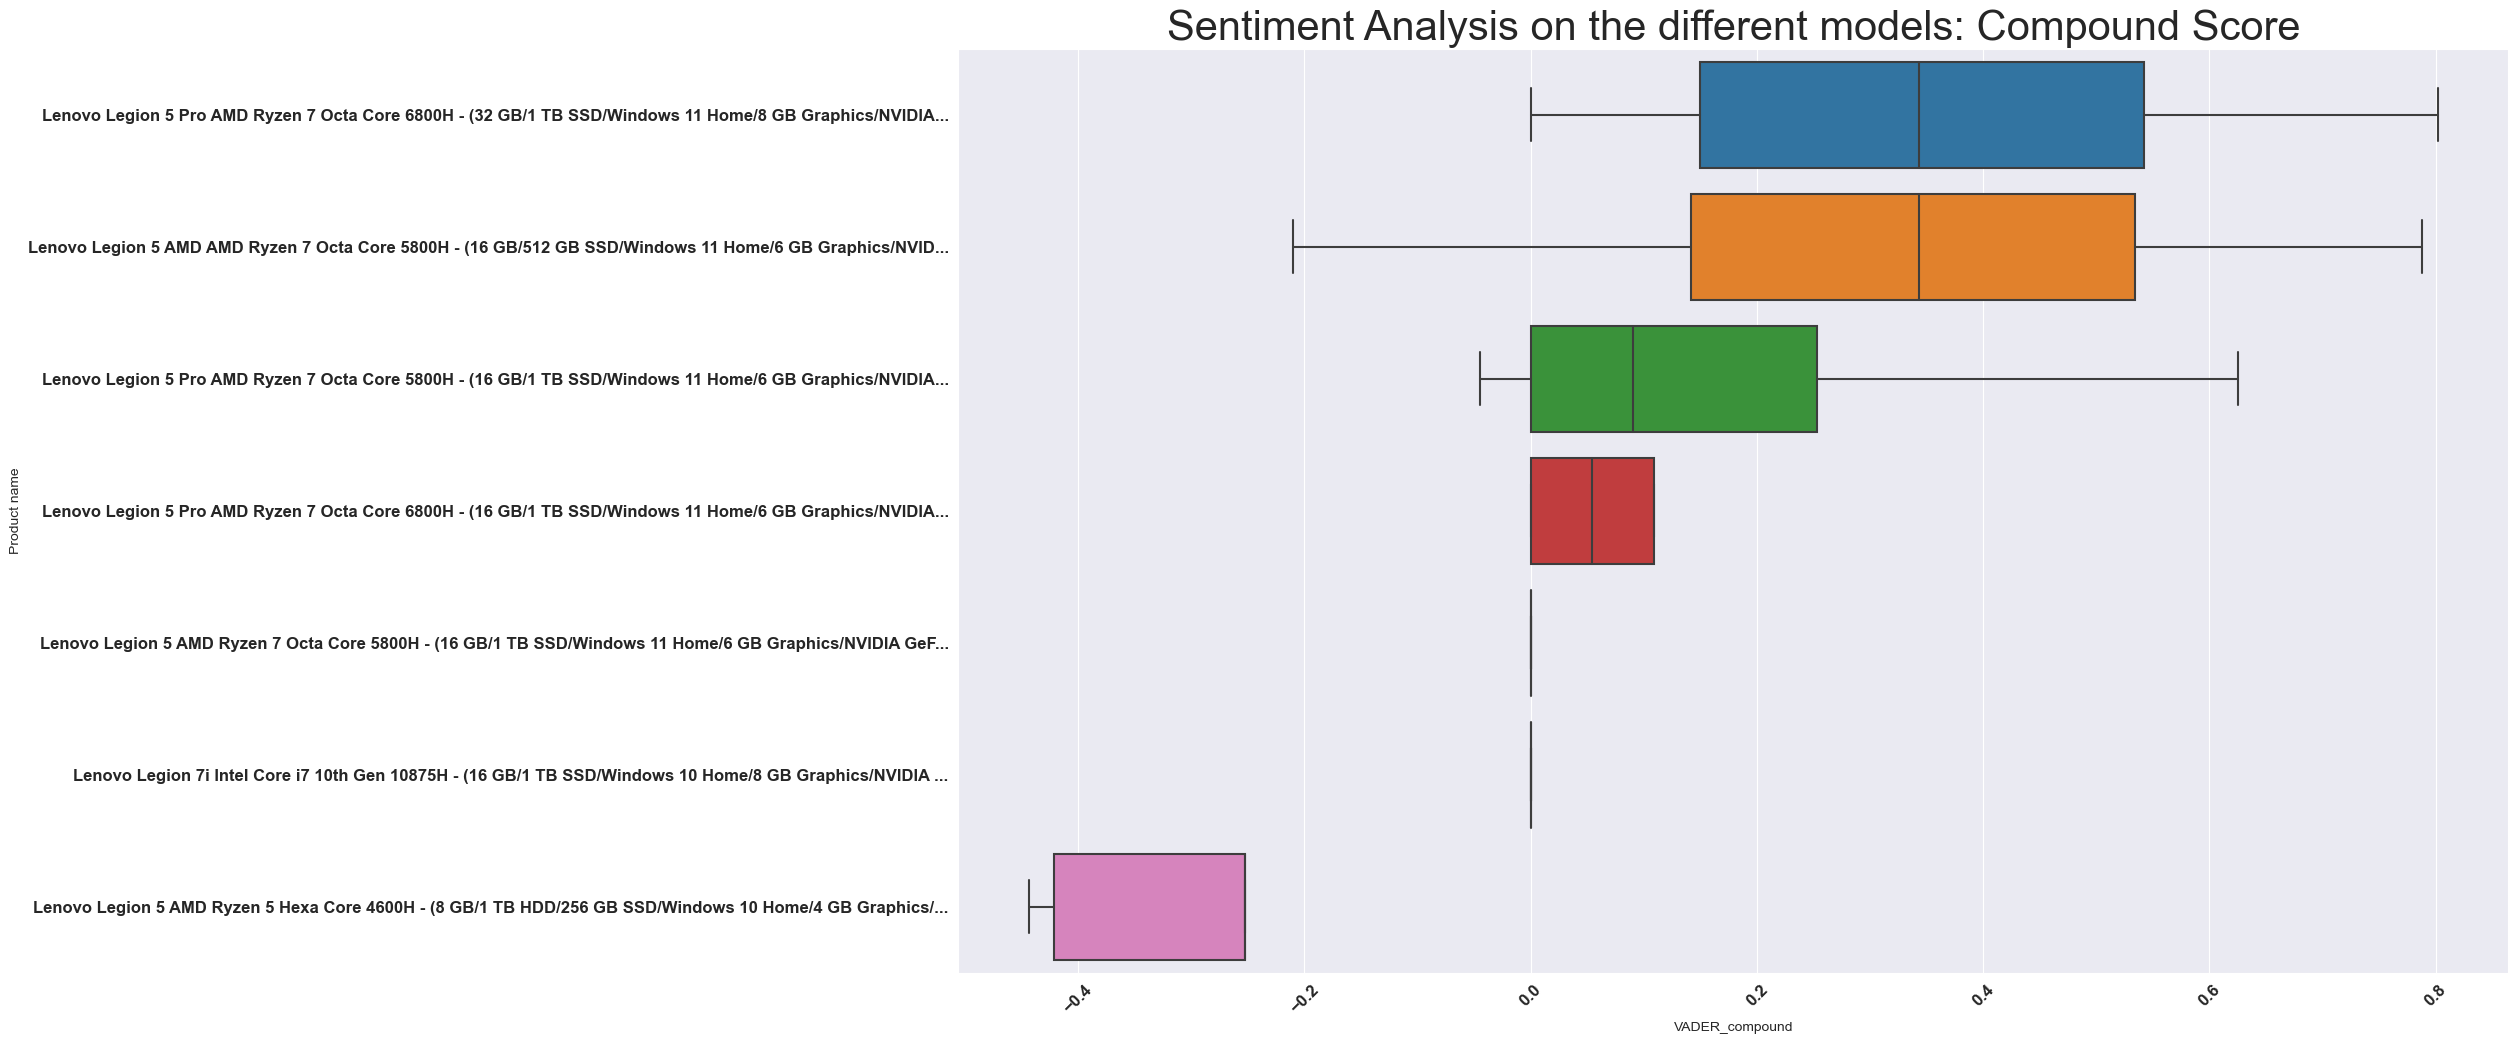

In [13]:
#Box Plot of VADER compound scores
newdf=df.sort_values("VADER_compound",ascending=False)
plt.figure(figsize=(20,12))
sns.set_style("darkgrid")
sns.boxplot(newdf, x='VADER_compound', y='Product name')  
plt.yticks(weight="bold",fontsize=12)
plt.xticks(weight="bold",rotation=45,fontsize=12)
plt.title("Sentiment Analysis on the different models: Compound Score",fontsize=30)

In [14]:
df["Product price"]=df["Product price"].str.split(" ").str.get(1).apply(lambda x: float(x))



Text(0.5, 0, 'Product Price')

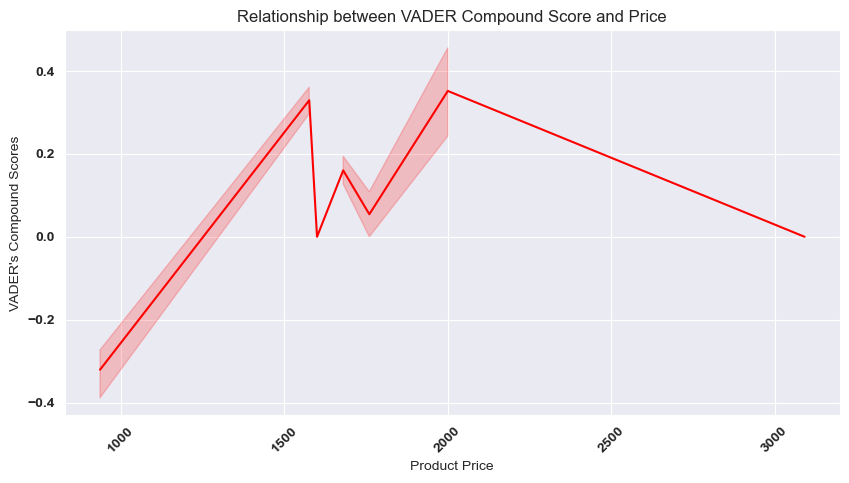

In [15]:
# Generally higher score for more expensive products. Could be buyer biasness.
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.lineplot(df,y="VADER_compound",x="Product price",color="red")
plt.xticks(rotation=45,weight="bold")
plt.yticks(weight="bold")
plt.title("Relationship between VADER Compound Score and Price")
plt.ylabel("VADER's Compound Scores")
plt.xlabel("Product Price")


In [16]:
newdf["Product name"].unique()

array(['Lenovo Legion 5 Pro AMD Ryzen 7 Octa Core 6800H - (32 GB/1 TB SSD/Windows 11 Home/8 GB Graphics/NVIDIA...',
       'Lenovo Legion 5 AMD AMD Ryzen 7 Octa Core 5800H - (16 GB/512 GB SSD/Windows 11 Home/6 GB Graphics/NVID...',
       'Lenovo Legion 5 Pro AMD Ryzen 7 Octa Core 5800H - (16 GB/1 TB SSD/Windows 11 Home/6 GB Graphics/NVIDIA...',
       'Lenovo Legion 5 Pro AMD Ryzen 7 Octa Core 6800H - (16 GB/1 TB SSD/Windows 11 Home/6 GB Graphics/NVIDIA...',
       'Lenovo Legion 5 AMD Ryzen 7 Octa Core 5800H - (16 GB/1 TB SSD/Windows 11 Home/6 GB Graphics/NVIDIA GeF...',
       'Lenovo Legion 7i Intel Core i7 10th Gen 10875H - (16 GB/1 TB SSD/Windows 10 Home/8 GB Graphics/NVIDIA ...',
       'Lenovo Legion 5 AMD Ryzen 5 Hexa Core 4600H - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home/4 GB Graphics/...'],
      dtype=object)

In [19]:
#Creating empty list to store review details
reviewdetails=[]

In [26]:
review_series=df["Review Detail"]

In [27]:
# Appending all reviews into a list
for review in review_series:
    reviewdetails.append(review)

In [32]:
#converting list into string
text=",".join(reviewdetails)
text

"Been using it for several months, and it's dependable for my daily use. Multitasking is smooth, and it runs most of my applications without any hiccups.,Battery lasts long enough for a full day's work without needing to plug in. It's perfect for long sessions at the cafe or library.,I love the sleek design of this laptop. It's lightweight and easy to carry around, which is great for my on-the-go lifestyle.,While it's a decent machine, it doesn't have the high-end features that I need for advanced gaming or video editing.,Been using it for several months, and it's dependable for my daily use. Multitasking is smooth, and it runs most of my applications without any hiccups.,Battery lasts long enough for a full day's work without needing to plug in. It's perfect for long sessions at the cafe or library.,I love the sleek design of this laptop. It's lightweight and easy to carry around, which is great for my on-the-go lifestyle.,While it's a decent machine, it doesn't have the high-end feat

In [76]:
#word cloud, restricting stopwords as its useless
wc=WordCloud(stopwords=STOPWORDS,background_color="black",colormap="Blues").generate(text)

Text(0.5, 1.0, 'Frequency of words found in reviews')

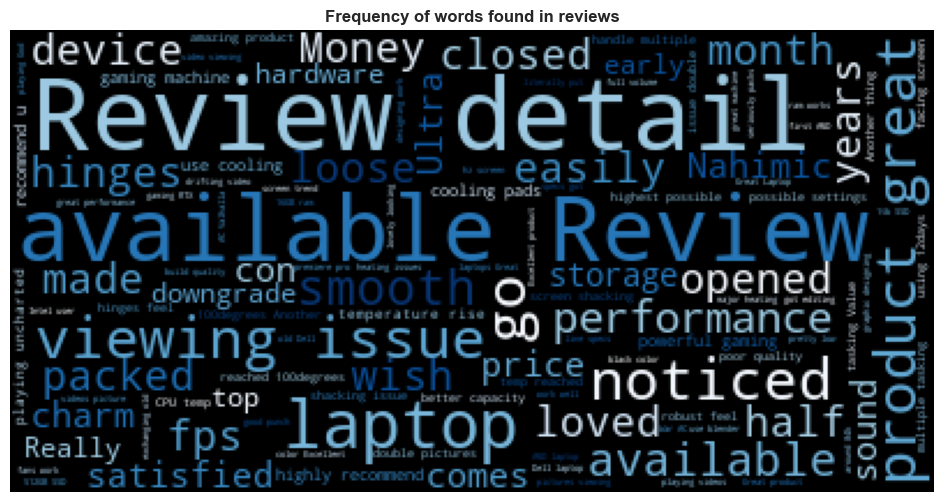

In [81]:
# Creating word cloud figure
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.title("Frequency of words found in reviews",weight="bold")
